In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import kreczko_v0_supportfiles as fn

In [2]:
df = fn.get_standard()
X = df.drop('isGluon',axis=1)
y = df['isGluon']
# validation dataset
df_valid = fn.get_modified()
X_valid = df_valid.drop('isGluon',axis=1)
y_valid = df_valid['isGluon']

In [3]:
print(df.head())

        mass  ntowers    radial  dispersion  isGluon
0   8.275855      0.0  0.000000    0.000000        0
1  18.406378      2.0  0.000000    0.000000        0
2   8.124520      6.0  0.400834    0.448262        0
3   4.995439      3.0  0.170562    0.561912        0
4   7.139542      4.0  0.237577    0.445743        0


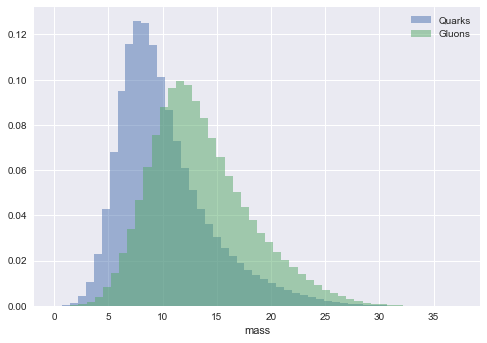

In [4]:
fn.plot(df)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# reduce training set size
X_train = X_train[:100000]
y_train = y_train[:100000]

In [6]:
# # gives 0.74
# from sklearn.naive_bayes import GaussianNB
# clf = GaussianNB()
# fn.test_method(clf, X_train, X_test, y_train, y_test, X_valid, y_valid, 'GaussianNB')

In [7]:
# 0.60
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(min_samples_split=20, random_state=99)
# fn.test_method(clf, X_train, X_test, y_train, y_test, X_valid, y_valid, 'DecisionTreeClassifier')

In [8]:
# gives 0.75
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,3), random_state=1)
# fn.test_method(clf, X_train, X_test, y_train, y_test, X_valid, y_valid, 'MLPClassifier')

In [9]:
# 0.66
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier()
# fn.test_method(clf, X_train, X_test, y_train, y_test, X_valid, y_valid, 'KNeighborsClassifier')

In [10]:
# from sklearn.manifold import TSNE
# n_samples = 1000
# model = TSNE(n_components=2, random_state=0)
# np.set_printoptions(suppress=True)
# X_tsne = model.fit_transform(X_test[:n_samples])

In [11]:
# dftsne = pd.DataFrame(X_tsne, columns=['x','y'], index=X_test[:n_samples].index)
# dftsne = pd.concat([dftsne, y_test[:n_samples]], axis=1, join_axes=[dftsne.index])

In [12]:
# g = sns.lmplot('x', 'y', dftsne, hue='isGluon', fit_reg=False, size=8
#                 ,scatter_kws={'alpha':0.7,'s':60}, palette="RdBu")

In [13]:
# takes too long
# from sklearn import svm
# clf = svm.SVC(kernel='rbf')
# fn.test_method(clf, X_train, X_test, y_train, y_test, X_valid, y_valid, 'svm_rbf')

In [14]:
# 0.73
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# clf = QuadraticDiscriminantAnalysis()
# fn.test_method(clf, X_train, X_test, y_train, y_test, X_valid, y_valid, 'QuadraticDiscriminantAnalysis')

=============== AdaBoostClassifier ===============
             precision    recall  f1-score   support

          0       0.78      0.89      0.83   1156965
          1       0.62      0.41      0.49    497126

avg / total       0.73      0.75      0.73   1654091

Confusion matrix, without normalization
[[1034630  122335]
 [ 294725  202401]]
Normalized confusion matrix
[[ 0.89426214  0.10573786]
 [ 0.59285775  0.40714225]]


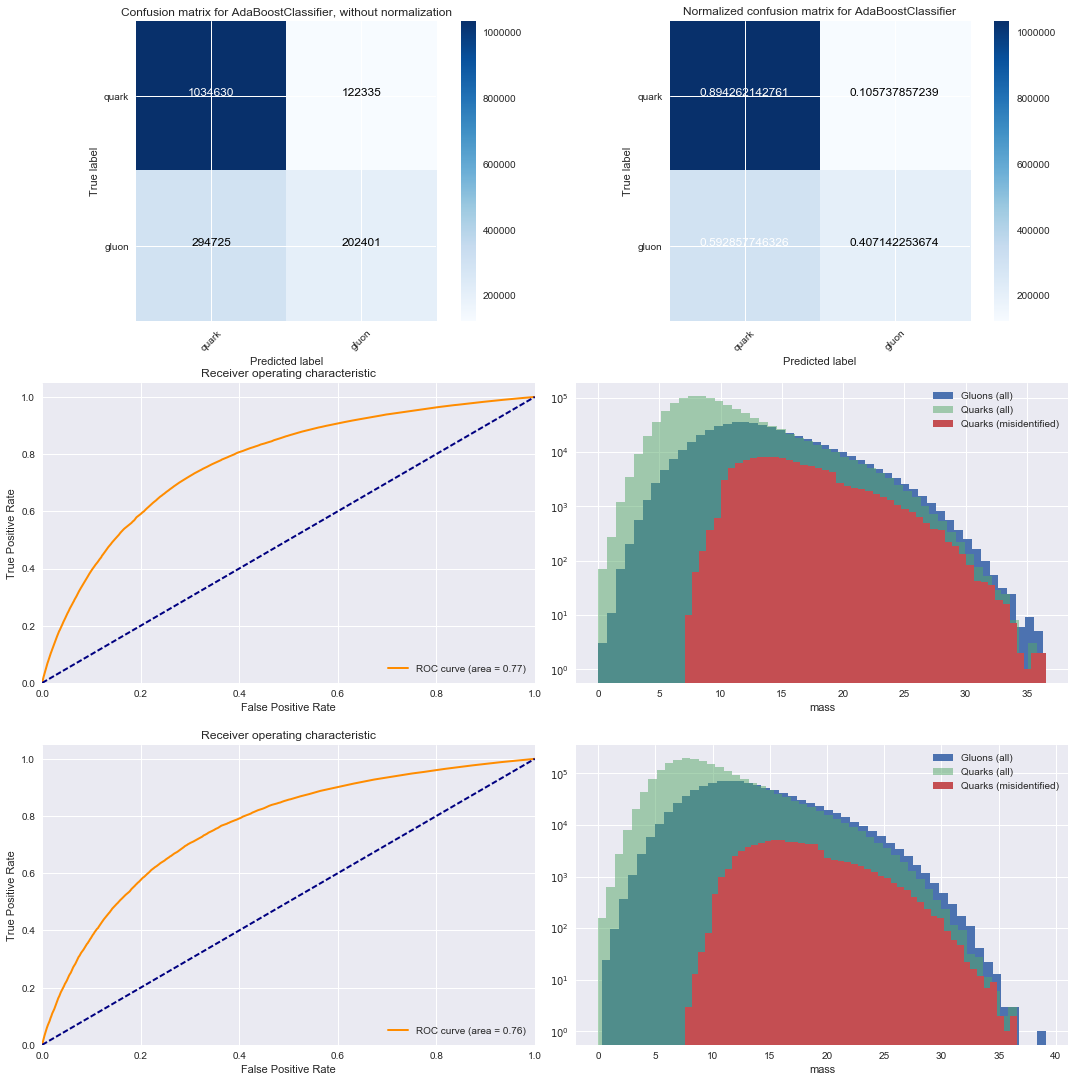

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [15]:
# 0.76
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
fn.test_method(clf, X_train, X_test, y_train, y_test, X_valid, y_valid, 'AdaBoostClassifier')

In [16]:
# uses too much memory
# from sklearn.gaussian_process import GaussianProcessClassifier
# clf = GaussianProcessClassifier()
# fn.test_method(clf, X_train, X_test, y_train, y_test, X_valid, y_valid, 'GaussianProcessClassifier')

In [17]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()
# fn.test_method(clf, X_train, X_test, y_train, y_test, X_valid, y_valid, 'RandomForestClassifier')

In [18]:
# from sklearn.linear_model import SGDClassifier
# clf = SGDClassifier(loss="modified_huber", penalty='l2')
# fn.test_method(clf, X_train, X_test, y_train, y_test, X_valid, y_valid, 'SGDClassifier')